In [3]:
# 라이브러리 import
import pymysql
import pandas as pd

# mysql 계정 정보 입력
##### password 변경 필요
con = pymysql.connect(host="localhost", user="root", password="password", db="coinanalysis", charset="utf8")
cur = con.cursor()

In [4]:
# mysql에서 가져올 테이블 지정 - BTC_220127_1d, ETH_220127_1d
query_BTC = "SELECT * FROM coinanalysis.BTC_220127_1d;"
query_ETH = "SELECT * FROM coinanalysis.ETH_220127_1d;"

# 데이터프레임 df에 테이블 저장
df_BTC = pd.read_sql(query_BTC, con)
df_ETH = pd.read_sql(query_ETH, con)

# 데이터 head와 tail 살펴보기
print(df_BTC.head(10))
print(df_BTC.tail(10))
print(df_ETH.head(10))
print(df_ETH.tail(10))

    ticker           date_time     open     high      low    close    volume  \
0  BTCUSDT 2017-08-17 09:00:00  4261.48  4485.39  4200.74  4285.08   795.150   
1  BTCUSDT 2017-08-18 09:00:00  4285.08  4371.52  3938.77  4108.37  1199.890   
2  BTCUSDT 2017-08-19 09:00:00  4108.37  4184.69  3850.00  4139.98   381.310   
3  BTCUSDT 2017-08-20 09:00:00  4120.98  4211.08  4032.62  4086.29   467.083   
4  BTCUSDT 2017-08-21 09:00:00  4069.13  4119.62  3911.79  4016.00   691.743   
5  BTCUSDT 2017-08-22 09:00:00  4016.00  4104.82  3400.00  4040.00   966.685   
6  BTCUSDT 2017-08-23 09:00:00  4040.00  4265.80  4013.89  4114.01  1001.140   
7  BTCUSDT 2017-08-24 09:00:00  4147.00  4371.68  4085.01  4316.01   787.419   
8  BTCUSDT 2017-08-25 09:00:00  4316.01  4453.91  4247.48  4280.68   573.613   
9  BTCUSDT 2017-08-26 09:00:00  4280.71  4367.00  4212.41  4337.44   228.108   

       value  trade_num  
0  3454770.0     3427.0  
1  5086960.0     5233.0  
2  1549480.0     2153.0  
3  1930360.0   

In [5]:
# 데이터 정보 확인
df_BTC.info()
df_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     1625 non-null   object        
 1   date_time  1625 non-null   datetime64[ns]
 2   open       1625 non-null   float64       
 3   high       1625 non-null   float64       
 4   low        1625 non-null   float64       
 5   close      1625 non-null   float64       
 6   volume     1625 non-null   float64       
 7   value      1625 non-null   float64       
 8   trade_num  1625 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 114.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     1625 non-null   object        
 1   date_time  1625 non-null   datetime64[ns]
 2   open 

In [15]:
# open, high, low, close 평균을 낸 mean 열 생성
df_BTC["mean"] = (df_BTC['open'] + df_BTC['high'] + df_BTC['low'] + df_BTC['close'])/4
df_ETH["mean"] = (df_ETH['open'] + df_ETH['high'] + df_ETH['low'] + df_ETH['close'])/4

In [16]:
# df_BTC 생성된 열 확인
df_BTC

ticker           date_time      open      high       low     close  \
0     BTCUSDT 2017-08-17 09:00:00   4261.48   4485.39   4200.74   4285.08   
1     BTCUSDT 2017-08-18 09:00:00   4285.08   4371.52   3938.77   4108.37   
2     BTCUSDT 2017-08-19 09:00:00   4108.37   4184.69   3850.00   4139.98   
3     BTCUSDT 2017-08-20 09:00:00   4120.98   4211.08   4032.62   4086.29   
4     BTCUSDT 2017-08-21 09:00:00   4069.13   4119.62   3911.79   4016.00   
...       ...                 ...       ...       ...       ...       ...   
1620  BTCUSDT 2022-01-23 09:00:00  35071.40  36499.00  34601.00  36244.60   
1621  BTCUSDT 2022-01-24 09:00:00  36244.60  37550.00  32917.20  36660.40   
1622  BTCUSDT 2022-01-25 09:00:00  36660.40  37545.10  35701.00  36958.30   
1623  BTCUSDT 2022-01-26 09:00:00  36958.30  38920.00  36234.60  36809.30   
1624  BTCUSDT 2022-01-27 09:00:00  36807.20  37234.50  35507.00  37160.10   

         volume         value  trade_num        mean  
0       795.150  3.454770e+06     3427.0   4308.1725  
1      1199.890  5.086960e+06     5233.0   4175.9350  
2       381.310  1.549480e+06     2153.0   4070.7600  
3       467.083  1.930360e+06     2321.0   4112.7425  
4       691.743  2.797230e+06     3972.0   4029.1350  
...         ...           ...        ...         ...  
1620  44279.500  1.572410e+09  1142410.0  35604.0000  
1621  91904.800  3.192040e+09  1999350.0  35843.0500  
1622  49232.400  1.799220e+09  1248250.0  36716.2000  
1623  69830.200  2.627490e+09  1584470.0  37230.5500  
1624  53020.900  1.925920e+09  1308410.0  36677.2000  

[1625 rows x 10 columns]

In [17]:
# df_ETH 생성된 열 확인
df_ETH

ticker           date_time     open     high      low    close  \
0     ETHUSDT 2017-08-17 09:00:00   301.13   312.18   298.00   302.00   
1     ETHUSDT 2017-08-18 09:00:00   302.00   311.79   283.94   293.96   
2     ETHUSDT 2017-08-19 09:00:00   293.31   299.90   278.00   290.91   
3     ETHUSDT 2017-08-20 09:00:00   289.41   300.53   282.85   299.10   
4     ETHUSDT 2017-08-21 09:00:00   299.10   346.52   294.60   323.29   
...       ...                 ...      ...      ...      ...      ...   
1620  ETHUSDT 2022-01-23 09:00:00  2412.18  2556.78  2370.80  2539.01   
1621  ETHUSDT 2022-01-24 09:00:00  2539.00  2539.75  2159.00  2439.29   
1622  ETHUSDT 2022-01-25 09:00:00  2439.56  2506.55  2348.96  2458.83   
1623  ETHUSDT 2022-01-26 09:00:00  2459.04  2722.00  2402.03  2462.99   
1624  ETHUSDT 2022-01-27 09:00:00  2463.00  2521.00  2316.43  2424.25   

          volume         value  trade_num       mean  
0        7030.71  2.154660e+06     4522.0   303.3275  
1        9537.85  2.858950e+06     5658.0   297.9225  
2        2146.20  6.200230e+05     1795.0   290.5300  
3        2510.14  7.428480e+05     2038.0   292.9725  
4        5219.45  1.689470e+06     3925.0   315.8775  
...          ...           ...        ...        ...  
1620   580498.00  1.431700e+09  1053660.0  2469.6925  
1621  1123130.00  2.592830e+09  1848890.0  2419.2600  
1622   510153.00  1.237050e+09   946366.0  2438.4750  
1623   806442.00  2.058600e+09  1384920.0  2511.5150  
1624   599482.00  1.448740e+09  1029200.0  2431.1700  

[1625 rows x 10 columns]

In [49]:
# 라이브러리 import
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pystan

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
from datetime import datetime

warnings.simplefilter(action='ignore')

<AxesSubplot:>

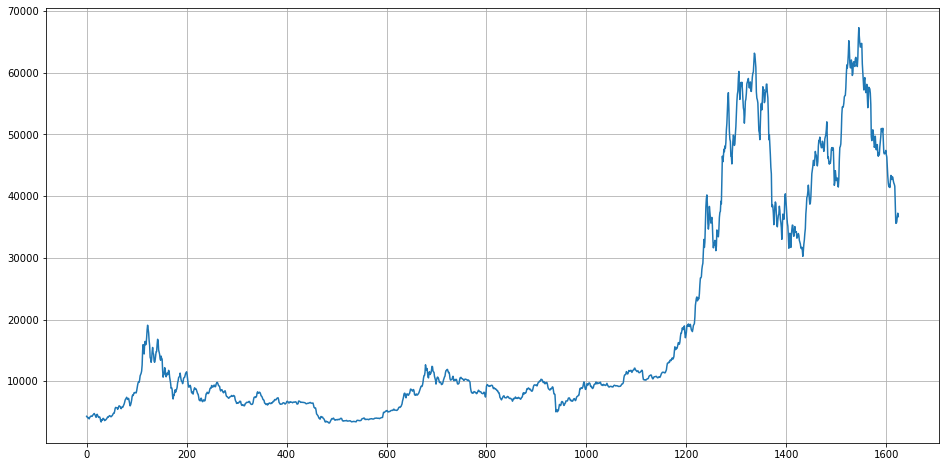

In [20]:
# df_BTC mean 그래프
df_BTC['mean'].plot(figsize=(16, 8), grid=True)

<AxesSubplot:>

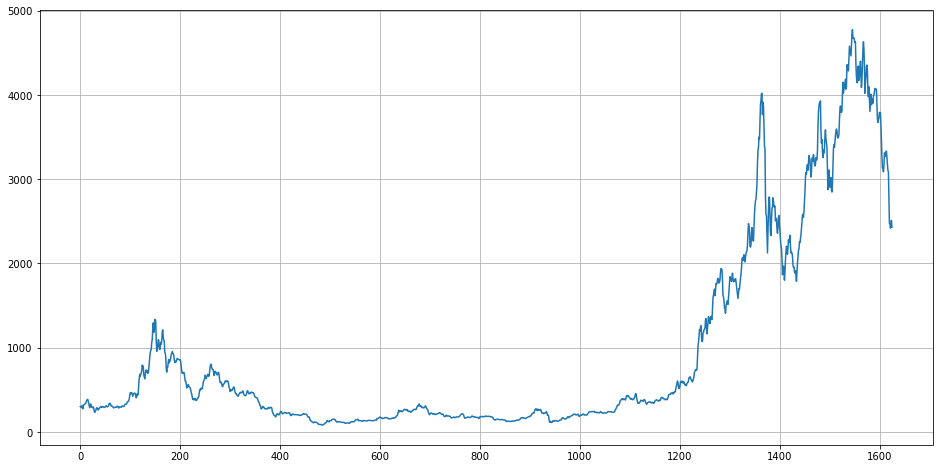

In [21]:
# df_ETH mean 그래프
df_ETH['mean'].plot(figsize=(16, 8), grid=True)

<AxesSubplot:>

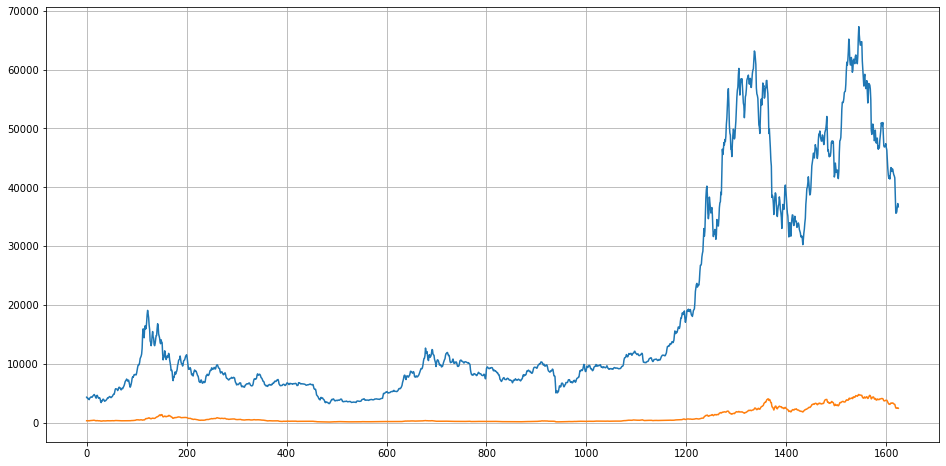

In [48]:
# df_BTC, df_ETH mean 그래프
df_BTC['mean'].plot(figsize=(16, 8), grid=True)
df_ETH['mean'].plot(figsize=(16, 8), grid=True)

In [26]:
# 모델의 정확도를 위해 일부 값(20%)을 떼어놓고 모델 적합
df_BTC_trunc = df_BTC[:1300]
df_BTC_trunc.tail()

ticker           date_time     open     high      low    close  \
1295  BTCUSDT 2021-03-04 09:00:00  50349.4  51773.9  47500.0  48374.1   
1296  BTCUSDT 2021-03-05 09:00:00  48374.1  49448.9  46300.0  48751.7   
1297  BTCUSDT 2021-03-06 09:00:00  48746.8  49200.0  47070.0  48882.2   
1298  BTCUSDT 2021-03-07 09:00:00  48882.2  51450.0  48882.2  50971.8   
1299  BTCUSDT 2021-03-08 09:00:00  50959.1  52402.8  49274.7  52375.2   

       volume         value  trade_num       mean  
1295  82649.7  4.079840e+09  2291940.0  49499.350  
1296  78192.5  3.727130e+09  2054220.0  48218.675  
1297  44399.2  2.143910e+09  1476470.0  48474.750  
1298  55235.0  2.778880e+09  1758100.0  50046.550  
1299  66987.4  3.400850e+09  1999400.0  51252.950

In [27]:
# 모델의 정확도를 위해 일부 값(20%)을 떼어놓고 모델 적합
df_ETH_trunc = df_ETH[:1300]
df_ETH_trunc.tail()

ticker           date_time     open     high      low    close  \
1295  ETHUSDT 2021-03-04 09:00:00  1567.68  1624.87  1506.36  1539.23   
1296  ETHUSDT 2021-03-05 09:00:00  1539.22  1548.96  1441.66  1528.31   
1297  ETHUSDT 2021-03-06 09:00:00  1528.08  1671.58  1513.03  1650.35   
1298  ETHUSDT 2021-03-07 09:00:00  1650.68  1734.16  1630.35  1726.16   
1299  ETHUSDT 2021-03-08 09:00:00  1726.46  1843.59  1664.96  1833.18   

         volume         value  trade_num       mean  
1295   946366.0  1.476460e+09  1125120.0  1559.5350  
1296   910786.0  1.355800e+09  1000910.0  1514.5375  
1297  1013300.0  1.611850e+09  1188530.0  1590.7600  
1298   848471.0  1.414990e+09  1166070.0  1685.3375  
1299  1149710.0  1.995140e+09  1407400.0  1767.0475

In [30]:
# Prophet의 형식이 'ds', 'y'이므로 해당 컬럼으로 df_BTC_mean 데이터 프레임 만들기
df_BTC_mean = pd.DataFrame({
    'ds' : df_BTC_trunc['date_time'], 
    'y' : df_BTC_trunc['mean']
})
df_BTC_mean.head()

ds          y
0 2017-08-17 09:00:00  4308.1725
1 2017-08-18 09:00:00  4175.9350
2 2017-08-19 09:00:00  4070.7600
3 2017-08-20 09:00:00  4112.7425
4 2017-08-21 09:00:00  4029.1350

In [59]:
# Prophet의 형식이 'ds', 'y'이므로 해당 컬럼으로 df_ETH_trunc_mean 데이터 프레임 만들기
df_ETH_mean = pd.DataFrame({
    'ds' : df_ETH_trunc['date_time'], 
    'y' : df_ETH_trunc['mean']
})
df_ETH_mean.head()

ds         y
0 2017-08-17 09:00:00  303.3275
1 2017-08-18 09:00:00  297.9225
2 2017-08-19 09:00:00  290.5300
3 2017-08-20 09:00:00  292.9725
4 2017-08-21 09:00:00  315.8775

In [32]:
# 계절성을 고려하여 모델 적합
model_BTC_mean = Prophet()
model_BTC_mean.yearly_seasonality=True
model_BTC_mean.weekly_seasonality=True
model_BTC_mean.daily_seasonality=True
model_BTC_mean.fit(df_BTC_mean)

In [60]:
# 계절성을 고려하여 모델 적합
model_ETH_mean = Prophet()
model_ETH_mean.yearly_seasonality=True
model_ETH_mean.weekly_seasonality=True
model_ETH_mean.daily_seasonality=True
model_ETH_mean.fit(df_ETH_mean)

In [35]:
# 325일(기존 데이터의 20%)이 추가된 데이터 프레임 future_BTC_mean 생성
future_BTC_mean = model_BTC_mean.make_future_dataframe(periods=325)
forecast_BTC_mean = model_BTC_mean.predict(future_BTC_mean)

# 해당 날짜에 값을 yhat으로 예측
forecast_BTC_mean[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower     yhat_upper
1620 2022-01-23 09:00:00  98309.715583  46128.370080  156493.481557
1621 2022-01-24 09:00:00  98447.248849  45616.135963  157048.156678
1622 2022-01-25 09:00:00  98596.437640  45533.165282  157131.112352
1623 2022-01-26 09:00:00  98783.949766  45769.709035  158111.936661
1624 2022-01-27 09:00:00  98993.313386  45200.130079  158257.084477

In [36]:
# 325일(기존 데이터의 20%)이 추가된 데이터 프레임 future_ETH_mean 생성
future_ETH_mean = model_ETH_mean.make_future_dataframe(periods=325)
forecast_ETH_mean = model_ETH_mean.predict(future_ETH_mean)

# 해당 날짜에 값을 yhat으로 예측
forecast_ETH_mean[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds         yhat   yhat_lower   yhat_upper
1620 2022-01-23 09:00:00  2964.157147  2445.178447  3466.106054
1621 2022-01-24 09:00:00  2969.295170  2453.599352  3476.751213
1622 2022-01-25 09:00:00  2971.006585  2467.804387  3474.474912
1623 2022-01-26 09:00:00  2975.848530  2424.779586  3506.794407
1624 2022-01-27 09:00:00  2980.160191  2444.178086  3509.893099

In [54]:
# 예측 결과 forecast_BTC_mean 시각화
plot_components_plotly(model_BTC_mean, forecast_BTC_mean)

In [55]:
# 예측 결과 forecast_ETH_mean 시각화
plot_components_plotly(model_ETH_mean, forecast_ETH_mean)

In [51]:
# forecast_BTC_mean 예측의 상한선과 하한선을 포함한 그래프
plot_plotly(model_BTC_mean, forecast_BTC_mean)

In [52]:
# forecast_ETH_mean 예측의 상한선과 하한선을 포함한 그래프
plot_plotly(model_ETH_mean, forecast_ETH_mean)

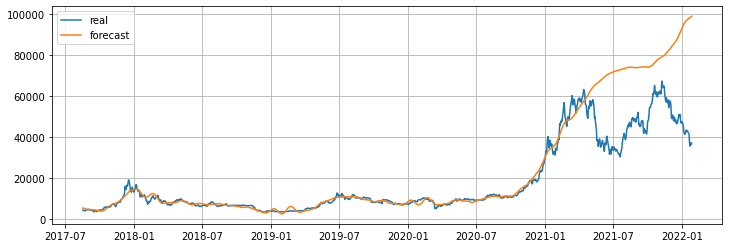

In [42]:
# df_BTC 실제값과 비교
plt.figure(figsize=(12, 4))
plt.plot(df_BTC['date_time'], df_BTC['mean'], label='real')
plt.plot(forecast_BTC_mean['ds'], forecast_BTC_mean['yhat'], label = 'forecast')
plt.grid(True)
plt.legend()
plt.show()

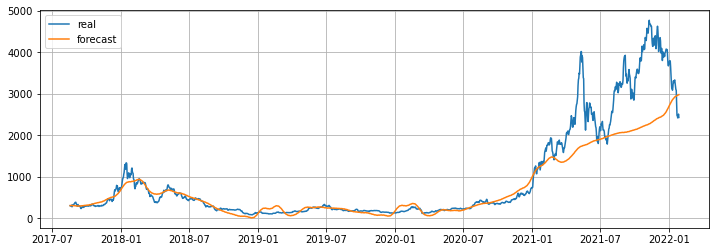

In [43]:
# df_ETH 실제값과 비교
plt.figure(figsize=(12, 4))
plt.plot(df_ETH['date_time'], df_ETH['mean'], label='real')
plt.plot(forecast_ETH_mean['ds'], forecast_ETH_mean['yhat'], label = 'forecast')
plt.grid(True)
plt.legend()
plt.show()

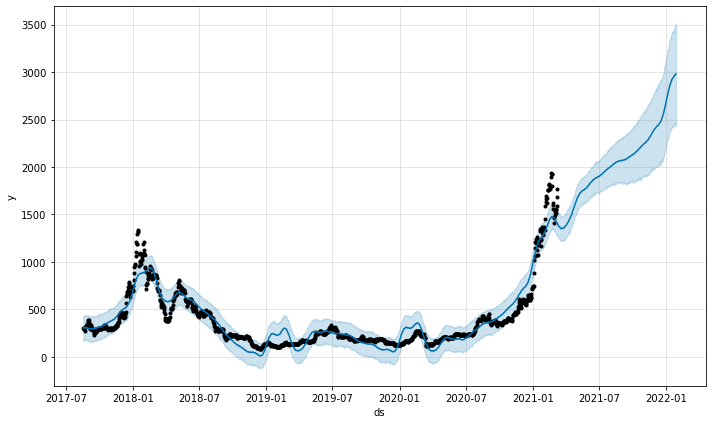

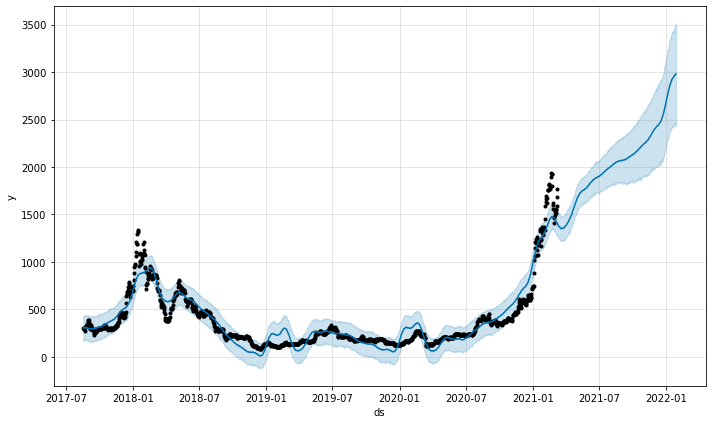

In [62]:
model_ETH_mean = Prophet(changepoint_prior_scale=0.8)
model_ETH_mean.yearly_seasonality=True
model_ETH_mean.weekly_seasonality=True
model_ETH_mean.daily_seasonality=True
forecast = model_ETH_mean.fit(df_ETH_mean).predict(future_ETH_mean)
model_ETH_mean.plot(forecast_ETH_mean)